In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [397]:
def bounding(img):
    temp = cv2.merge([img,img,img])
    h,w = img.shape
    
    y,x = np.where(img==255)

    start_point = (np.min(x),np.min(y))
    end_point = (np.max(x),np.max(y))

    temp = cv2.rectangle(temp,start_point, end_point, (255,0,0),5)

    plt.figure(figsize=[18,18])
    plt.subplot(121)
    plt.imshow(img,cmap='gray')
    plt.subplot(122)
    plt.imshow(temp)

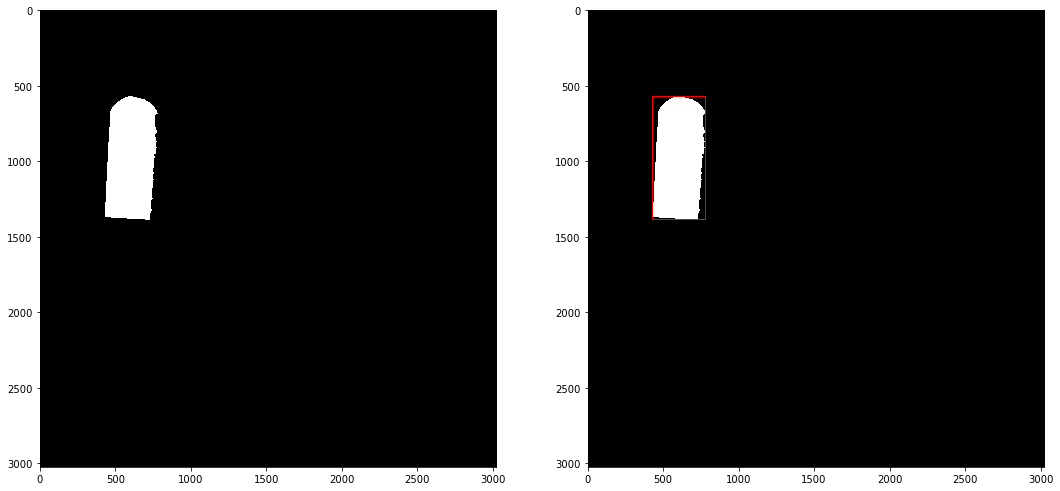

In [432]:
bounding(result)

# 20201212 Final -------

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob

In [179]:
vs = cv2.VideoCapture(0)
cnt=0
# no=1
while True:
    ret, frame = vs.read()
    if not ret:
        continue
    cnt+=1
    if(cnt==10):
        cv2.imwrite(f'./image/test{no}.jpg',frame)
        print(f'save{no}')
        no+=1
        break
#     cv2.imshow('Frame', frame)
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

save2


In [7]:
classes =['airpod','concent_case','eraser','gender_changer','glasses_case','knife','lens_case','lens_cover','tissue','triangle']

print(classes)
print(len(classes))


['airpod', 'concent_case', 'eraser', 'gender_changer', 'glasses_case', 'knife', 'lens_case', 'lens_cover', 'tissue', 'triangle']
10


In [8]:
#save file names
files=[]
for name in classes:
    files.append( [i for i in glob.glob('./image/*.*') if i.startswith(f'./image\\{name}')] )    

In [9]:
name = files[1]
name

['./image\\concent_case1.jpg',
 './image\\concent_case10.jpg',
 './image\\concent_case11.jpg',
 './image\\concent_case12.jpg',
 './image\\concent_case2.jpg',
 './image\\concent_case3.jpg',
 './image\\concent_case4.jpg',
 './image\\concent_case5.jpg',
 './image\\concent_case6.jpg',
 './image\\concent_case7.jpg',
 './image\\concent_case8.jpg',
 './image\\concent_case9.jpg']

In [12]:
dic ={}

max_area = -np.inf
max_perimeter = -np.inf
max_formfactor = -np.inf
Mean=[]
for j in range(10):
    name = files[j]
    value=[]
    mean_value=[]
    print(j+1,name[0][8:],end=' ')
    area,perimeter,formfactor =0,0,0
    for i in range(len(name)):
        img = cv2.imread(name[i],0)
        
        temp = calc(img)
        
        # 미리 값을 구하고 정규화
        temp[0]/=102673 ; temp[1]/=1384;
        
        area+=temp[0]; perimeter+=temp[1]; formfactor+=temp[2]
        
        #save maximum value 
        if(temp[0] > max_area):
            max_area=temp[0]
        if(temp[1] > max_perimeter):
            max_perimeter=temp[1]
        if(temp[2] > max_formfactor):
            max_formfactor=temp[2]
            
        value.append(temp)
        
    area/=12; perimeter/=12; formfactor/=12
    
    mean_value.append(area)
    mean_value.append(perimeter)
    mean_value.append(formfactor)
    
    Mean.append(mean_value)
    
    value =np.array(value)
    print(len(value))
    dic[name[0][8:]] = value

Mean = np.array(Mean)
    
print(f'\nMaximum value \narea :{max_area}\nperimeter :{max_perimeter}\nFormfactor :{max_formfactor}')

1 airpod1.jpg 12
2 concent_case1.jpg 12
3 eraser1.jpg 12
4 gender_changer1.jpg 12
5 glasses_case1.jpg 12
6 knife1.jpg 12
7 lens_case1.jpg 12
8 lens_cover1.jpg 12
9 tissue1.jpg 12
10 triangle1.jpg 12

Maximum value 
area :1.0
perimeter :0.9999781041883702
Formfactor :0.8993366974356575


In [13]:
Mean

array([[0.22385673, 0.43012028, 0.81494108],
       [0.13754022, 0.34167159, 0.79330488],
       [0.13499857, 0.38609487, 0.61089981],
       [0.01404053, 0.11902833, 0.66864084],
       [0.93202895, 0.9701838 , 0.66730118],
       [0.02133594, 0.21795461, 0.32211362],
       [0.14444279, 0.37194501, 0.70314756],
       [0.06710179, 0.22621007, 0.88303732],
       [0.63373282, 0.78683836, 0.68954896],
       [0.05240221, 0.24607146, 0.58319894]])

In [430]:
color =['red','orange','yellow','green','blue','navy','purple','pink','brown','black']

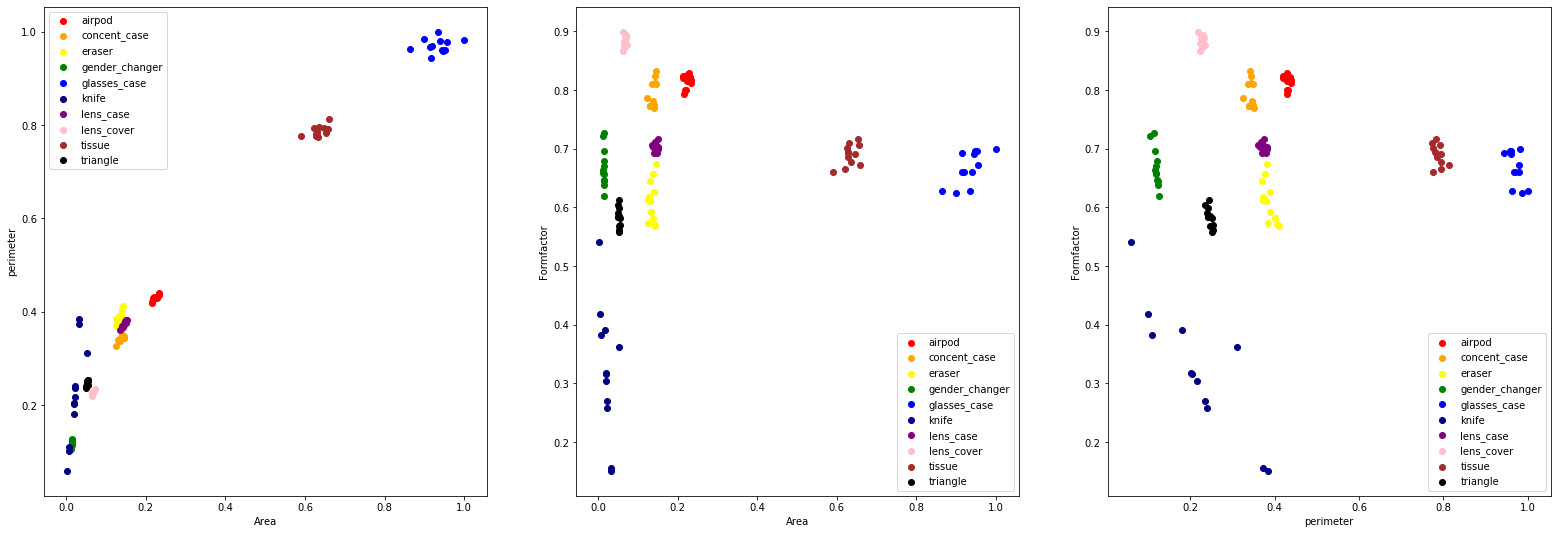

In [431]:
plt.figure(figsize=[27,9])
plt.subplot(131)
cnt=0
for key in dic.keys():
    label=True
    for value in dic[key]:
        if label:
            plt.scatter(value[0],value[1],c=color[cnt], label=key.split('.')[0][:-1])
            label =False
        else:
            plt.scatter(value[0],value[1],c=color[cnt])
    cnt+=1
plt.xlabel('Area')
plt.ylabel('perimeter')
plt.legend()

plt.subplot(132)
cnt=0
for key in dic.keys():
    label=True
    for value in dic[key]:
        if label:
            plt.scatter(value[0],value[2],c=color[cnt], label=key.split('.')[0][:-1])
            label =False
        else:
            plt.scatter(value[0],value[2],c=color[cnt])
    cnt+=1
plt.xlabel('Area')
plt.ylabel('Formfactor')
plt.legend()

plt.subplot(133)
cnt=0
for key in dic.keys():
    label=True
    for value in dic[key]:
        if label:
            plt.scatter(value[1],value[2],c=color[cnt], label=key.split('.')[0][:-1])
            label =False
        else:
            plt.scatter(value[1],value[2],c=color[cnt])
    cnt+=1
plt.xlabel('perimeter')
plt.ylabel('Formfactor')
plt.legend()

plt.show()

In [11]:
def calc(img):
    ret, img = cv2.threshold(img , 20, 255, cv2.THRESH_BINARY)
    
    kernel = np.ones((10, 10), np.uint8)
    result = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    
    
    temp= result.copy()
    
    image, contours , hierachy  = cv2.findContours(temp, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    
    
    for ob in range(len(contours)):
        contour =contours[ob]
        mmt = cv2.moments(contour)
        center_x,center_y = int(mmt['m10']/(mmt['m00']+1e-6)),int(mmt['m01']/(mmt['m00']+1e-6))

        area= cv2.contourArea(contours[ob])


        mask =np.array([[5,6,7],[4,0,0],[3,2,1]])
        edge= contours[ob].copy()
        edge = edge.tolist()
        edge.append(edge[0])
        edge = np.array(edge)
        chain = np.zeros_like(temp)
        chain_code=[]
        for i in range(len(edge)-1):
            chain[edge[i][0][1],edge[i][0][0]] =1
            chain[edge[i+1][0][1],edge[i+1][0][0]] =1
            test= chain[edge[i][0][1]-1:edge[i][0][1]+2,edge[i][0][0]-1:edge[i][0][0]+2]

            chain_code.append(np.max(test*mask))

            chain[edge[i][0][1],edge[i][0][0]] =0
            chain[edge[i+1][0][1],edge[i+1][0][0]] =0
        
        chain_code = np.array(chain_code)
        perimeter= 0.
        for i in chain_code:
            if(i in [6,0,2,4]):
                perimeter+=1.
            else:
                perimeter+=2**(1/2)
        

        Formfactor = 4 * np.pi * area / ((perimeter)**2+1e-4)

        calc_value = np.array([area,perimeter,Formfactor])
    
    

    return calc_value

# Real-time

In [ ]:
vs = cv2.VideoCapture(0)


while True:
    ret, frame = vs.read()
    if not ret:
        continue
    frame=cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    frame = get_perimeter(frame)
    
    cv2.imshow('Frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

In [15]:
def get_perimeter(img):
    origin = cv2.merge([img,img,img])
    
    ret, img = cv2.threshold(img , 10, 255, cv2.THRESH_BINARY)
    
    kernel = np.ones((10, 10), np.uint8)
    result = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    
#     kernel = np.ones((5, 5), np.uint8)
#     result = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    
    temp= result.copy()
#     output=cv2.merge([temp,temp,temp])
    output=origin.copy()
    
    
    
#     return temp
    image, contours , hierachy  = cv2.findContours(temp, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    
    
    for ob in range(len(contours)):
        contour =contours[ob]
        mmt = cv2.moments(contour)
        center_x,center_y = int(mmt['m10']/(mmt['m00']+1e-6)),int(mmt['m01']/(mmt['m00']+1e-6))
#         print('중심점:',center_x, center_y)

#         x,y = np.where(temp==255)
#         area = len(x)
#         print(f'Pixel개수: {area}')

        area= cv2.contourArea(contours[ob])
#         print('넓이:',area)


        for i in contours[ob]:
            output[i[0][1]:i[0][1]+4,i[0][0]:i[0][0]+4,:]=[255,0,0]


        output[center_y:center_y+5,center_x:center_x+5]=[0,0,255]
        
        

        mask =np.array([[5,6,7],[4,0,0],[3,2,1]])
        edge= contours[ob].copy()
        edge = edge.tolist()
        edge.append(edge[0])
        edge = np.array(edge)
        chain = np.zeros_like(temp)
        chain_code=[]
        try:
            for i in range(len(edge)-1):
                chain[edge[i][0][1],edge[i][0][0]] =1
                chain[edge[i+1][0][1],edge[i+1][0][0]] =1
                test= chain[edge[i][0][1]-1:edge[i][0][1]+2,edge[i][0][0]-1:edge[i][0][0]+2]

                chain_code.append(np.max(test*mask))

                chain[edge[i][0][1],edge[i][0][0]] =0
                chain[edge[i+1][0][1],edge[i+1][0][0]] =0
        except:
            pass

        chain_code = np.array(chain_code)
        perimeter= 0.
        for i in chain_code:
            if(i in [6,0,2,4]):
                perimeter+=1.
            else:
                perimeter+=2**(1/2)
        
        
#         print(f'perimeter:{perimeter}')

        
        Formfactor = 4 * np.pi * area / ((perimeter)**2+1e-4)
#         print(f'Formfactor:{Formfactor}')
        
        calc_value = np.array([area/102673,perimeter/1384,Formfactor])
#         calc_value = np.array([perimeter,Formfactor*1e4])
    
    
#         print(calc_value)
        value_norm=[]
        for i in range(len(Mean)):
            value_norm.append(np.linalg.norm(Mean[i][1:]-calc_value[1:]))
#         print(value_norm)
        value_norm=np.array(value_norm)
#         print(value_norm)
        what=classes[np.where(value_norm==np.min(value_norm))[0][0]]
        
        output = cv2.putText(output, (f'{what}'), 
                               (center_x-40, center_y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
        
    

#         output = cv2.putText(output, (f'Formfactor:{Formfactor:.2f}'), 
#                                (center_x, center_y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,255), 2)
#         output = cv2.putText(output, (f'Area:{area}'), 
#                                (center_x, center_y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,255), 2)
#         output = cv2.putText(output, (f'perimeter:{perimeter:.2f}'), 
#                                (center_x, center_y+20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,255), 2)
    return output

# Capture

In [433]:
vs = cv2.VideoCapture(0)
cnt=0

while True:
    ret, frame = vs.read()
    if not ret:
        continue
    cnt+=1
    if(cnt==10):
        cv2.imwrite(f'./image/test.jpg',frame)
        print(f'save')
        
        break
#     cv2.imshow('Frame', frame)
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

save


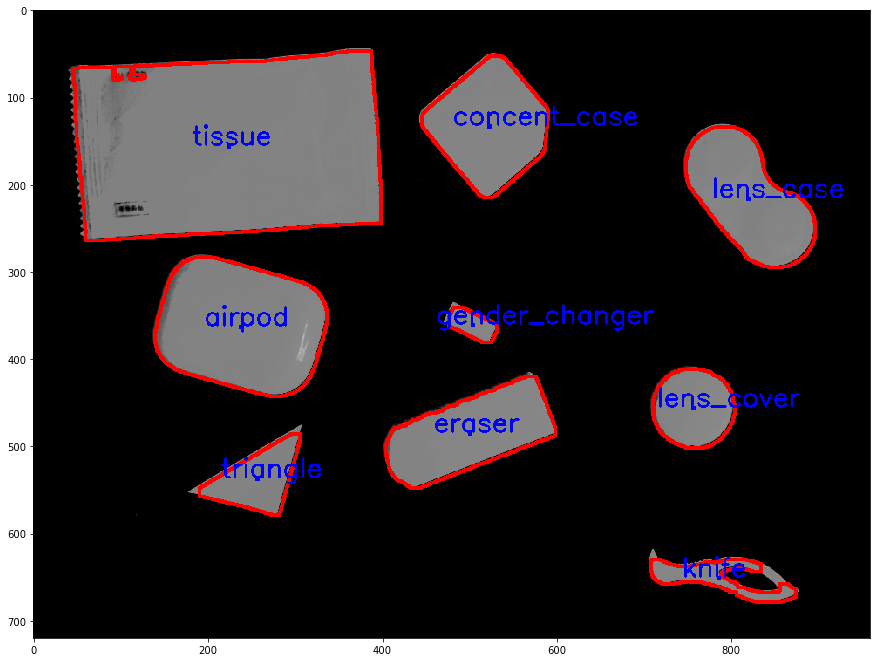

In [467]:
img = cv2.imread('./image/test1.jpg',0)
img = get_perimeter(img)
plt.figure(figsize=[15,15])
plt.imshow(img)